# Homework 1 - CPE 965
## Han Chau - 20012654

[42 points] In this problem, we write a program to estimate the parameters for an unknown polynomial using the polyfit() function of the numpy package.

1. Please plot the noisy data and the polynomial you found (in the same figure). You can use any value of m selected from 2, 3, 4, 5, 6.
2. Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6, 7, 8 respectively. Identify the best choice of m.
3. Change variable noise_scale to 200, 300, 400, 600, 800, 1000 respectively, re-run the algorithm and plot the polynomials with the m found in 2). Discuss the impact of noise scale to the accuracy of the returned parameters. [You need to plot a figure like in 1) for EACH choice of noise_scale.]
4. Change variable number_of_samples to 40, 30, 20, 10 respectively, re-ran the algorithm and plot the polynomials with the m found in 2). Discuss the impact of the number of samples to the accuracy of the returned parameters. [You need to plot a figure like in 1) for EACH choice of number_of_samples.]

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') 
import numpy as np

/var/folders/xh/9s8p6wv51lb17v8j4lqd9zrr0000gn/T/ipykernel_11823/77184155.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


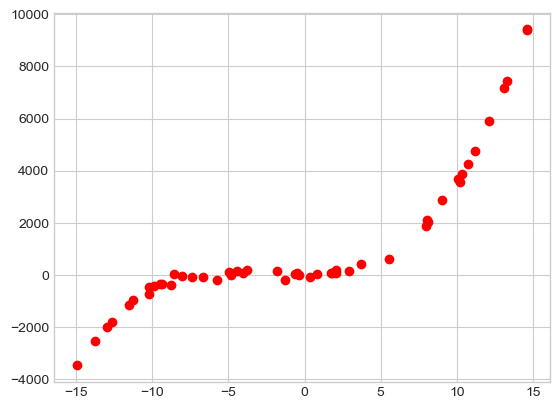

In [2]:
noise_scale = 100
number_of_samples = 50
x = 30*(np.random.rand(number_of_samples, 1) - 0.5)
y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_samples, 1) 
plt.plot(x,y,'ro', label='Data set')

### Question 1:

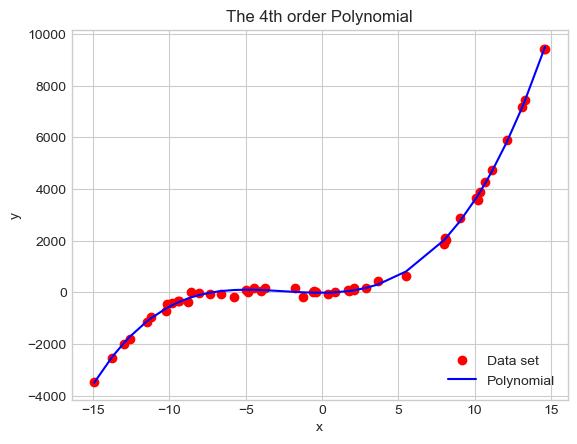

In [3]:
m = 4
scale = np.polyfit(x[:,0], y[:,0], deg=m)
poly = np.poly1d(scale)
# print(poly)
x_new = np.sort(x, axis = 0)
# print(x_new)
y_line = np.zeros(len(x_new))
for index in range(len(x_new)):
    y_line[index] = poly(x_new[index])
plt.plot(x,y,'ro', label='Data set')
plt.plot(x_new, y_line, 'b',label='Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'The {m}th order Polynomial')
plt.legend(loc='lower right')

### Question 2:

In [22]:
def MSE(x,y,m=8):
    error_poly = np.zeros(m)
    n = len(x)
    
    for order in range(1,m+1):
        z = np.polyfit(x[:,0], y[:,0], deg=order)
        poly_list = np.poly1d(z)
        error = 0
        for i in range(n):
            f_x_i = 0
            for index_number in range(order+1):
                f_x_i += poly_list[index_number]*(x[i])**index_number
            error += (f_x_i - y[i])**2
    
        error_poly[order-1] = error/n
        
    return error_poly

The best choice of m based on MSE (value:  10391.88) is 3.


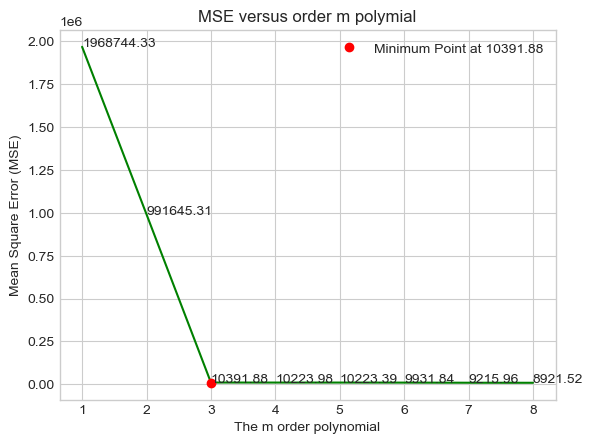

In [23]:
mean_square = MSE(x,y)
order_m = list(range(9))
combine = dict(zip(order_m[1:], mean_square))
min_mse = combine[3]
plt.plot(order_m[1:], mean_square, 'g-')
plt.plot(3, min_mse, 'ro',label='Minimum Point at ' + str(round(min_mse,2)))
plt.xlabel('The m order polynomial')
plt.ylabel('Mean Square Error (MSE)')
plt.title('MSE versus order m polymial')
plt.legend(loc='upper right')
for i in range(8):
    plt.annotate(str(round(mean_square[i],2)), xy=(order_m[1:][i], mean_square[i]))
print(f'The best choice of m based on MSE (value: {min_mse: .2f}) is 3.')

### Question 3:

/var/folders/xh/9s8p6wv51lb17v8j4lqd9zrr0000gn/T/ipykernel_11823/1232906855.py:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i+1)


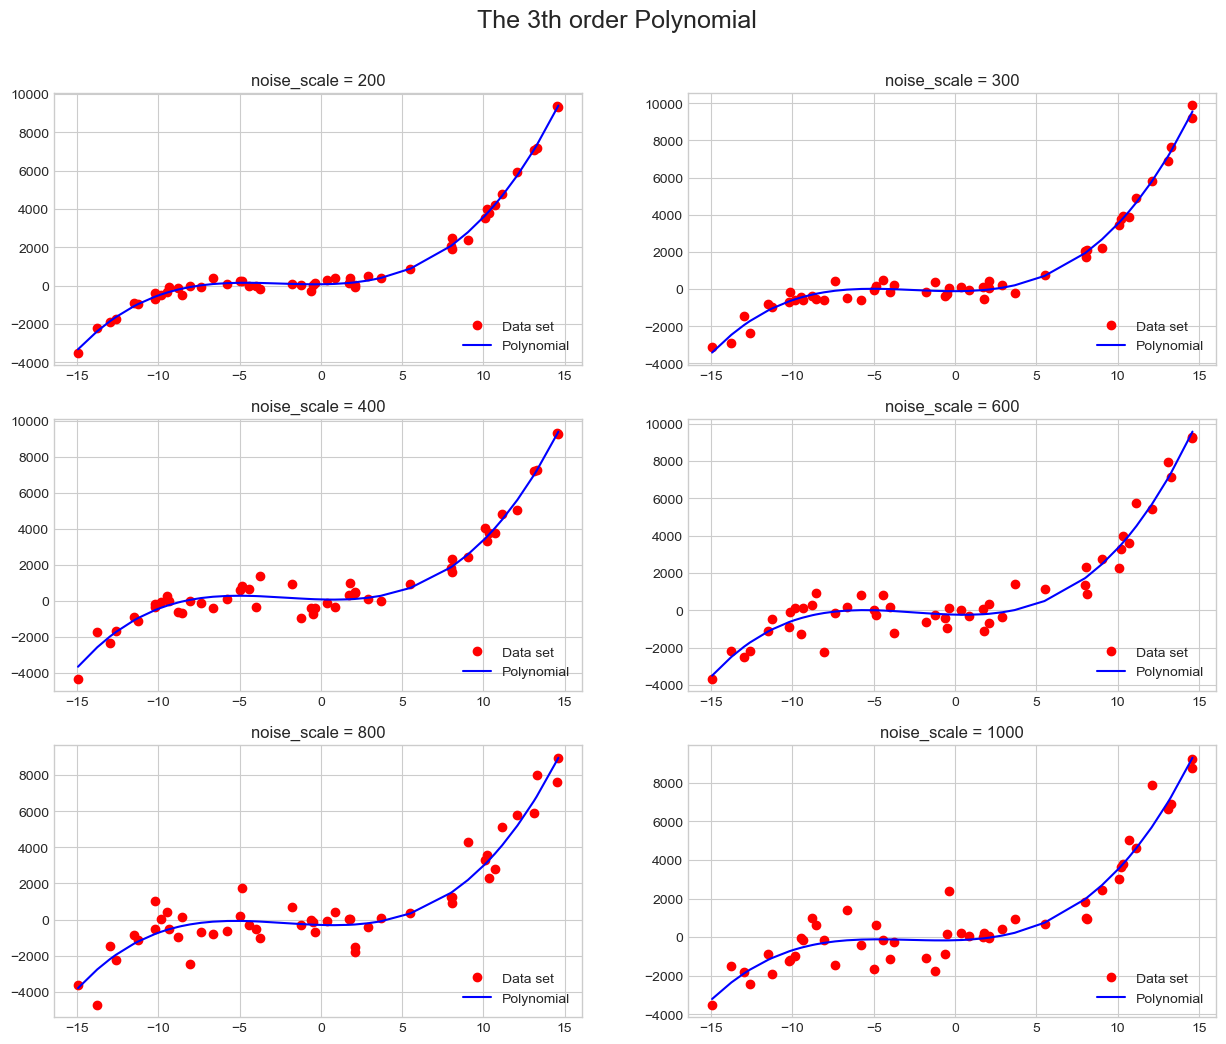

In [25]:
def noise_scale(x):
    noise_change = [200, 300, 400, 600, 800, 1000]
    x_new = np.sort(x, axis = 0)
    n = len(noise_change)
    
    y_line_total = []
    y_input = []
    for order in range(n):
        y = 5 * x + 15 * x**2 + 2 * x**3 + noise_change[order]*np.random.randn(number_of_samples, 1)
        y_input.append(y)
        m = 3
        scale = np.polyfit(x[:,0], y[:,0], deg=m)
        poly = np.poly1d(scale)
        # print(poly)
        y_line = np.zeros(len(x_new))
        for index in range(len(x_new)):
            y_line[index] = poly(x_new[index])
        y_line_total.append(y_line)
    
        
    fig=plt.subplots(figsize=(15, 12))
    plt.suptitle(f'The {m}th order Polynomial', fontsize=18, y=0.95)
    for i in range(len(noise_change)):
        plt.subplot(3, 2, i+1)
        plt.plot(x,y_input[i],'ro', label='Data set')
        plt.plot(x_new, y_line_total[i], 'b',label='Polynomial')
        plt.title(f'noise_scale = {noise_change[i]}')
        plt.legend(loc='lower right')
    plt.show()
    
noise_scale(x)

==> Based on the above graphs, the increasing the noise scale, the decreasing the accuracy of the returned parameters and the fitting of the polynomial line. When we increase the noise of scale, the line will be bias.

### Question 4

/var/folders/xh/9s8p6wv51lb17v8j4lqd9zrr0000gn/T/ipykernel_11823/3075701199.py:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)


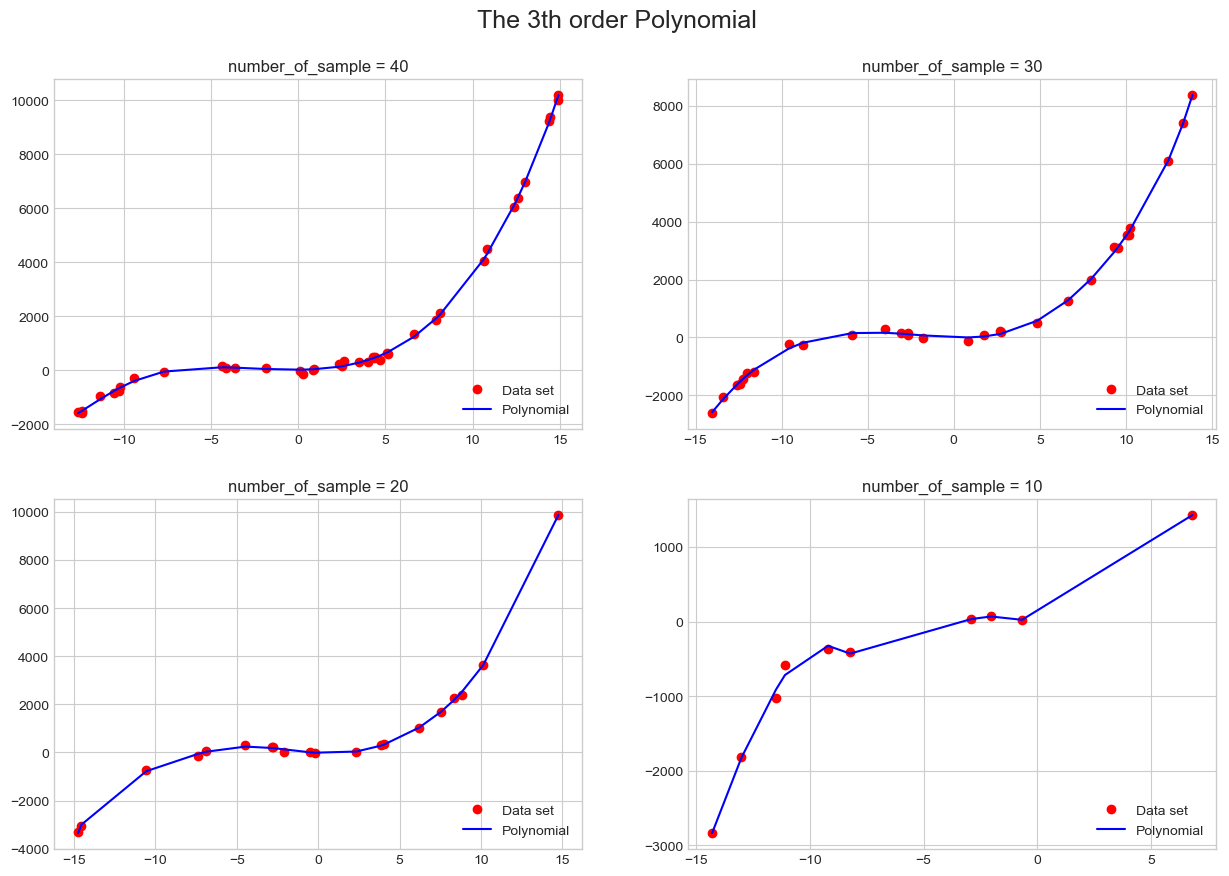

In [26]:
number_of_sample = [40,30,20,10]
n = len(number_of_sample)
noise_scale = 100
x_input = []
x_line = []
y_line_total = []
y_input = []

for order in range(n):
    x = 30*(np.random.rand(number_of_sample[order], 1) - 0.5)
    x_input.append(x)
    x_new = np.sort(x, axis = 0)
    x_line.append(x_new)
    y = 5 * x + 15 * x**2 + 2 * x**3 + noise_scale*np.random.randn(number_of_sample[order], 1)
    y_input.append(y)
    m = 3
    scale = np.polyfit(x[:,0], y[:,0], deg=8)
    poly = np.poly1d(scale)
    
    y_line = np.zeros(len(x_new))
    for index in range(len(x_new)):
        y_line[index] = poly(x_new[index])
    y_line_total.append(y_line)
    
fig=plt.subplots(figsize=(15, 10))
plt.suptitle(f'The {m}th order Polynomial', fontsize=18, y=0.95)
for i in range(n):
    plt.subplot(2, 2, i+1)
    plt.plot(x_input[i],y_input[i],'ro', label='Data set')
    plt.plot(x_line[i], y_line_total[i], 'b',label='Polynomial')
    plt.title(f'number_of_sample = {number_of_sample[i]}')
    plt.legend(loc='lower right')
plt.show()
 

==> Based on the above graphs, the decrease the number of samples, the increasing the accuracy of the returned parameters and the fitting of the polynomial line. If the number of sample is too small, the model will show overfitting.